# 목표
* 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측한다.
1. train.csv로 다양한 활동을 통해 우수한 결정 트리 모델을 만든다.
2. 이때에 일반화 성능을 RMSE로 측정해서, 40~60을 목표
3. test.csv에 대해 예측을 만들어 낸다.
  - 다음 페이지에 주어진 것을 제외하고 인터넷을 참고하지 않으며 수업시간에 배운 것들만 활용함
  - 이 데이터 셋과 직접 연관이 없는 일반적인 명령들을 인터넷 검색을 통해 알아볼 수는 있음

# 특성들
* datetime: 날짜와 시간
* season: 1=봄, 2=여름, 3=가을, 4=겨울
* holiday: 1=(주말 아닌)공휴일, 0=공휴일이 아닌 날
* workingday: 1=일하는 날, 0=주말 및 공휴일
* weather: 0=맑음, 약간 구름 낀 흐림, 2=안개, 안개+흐림, 3=가벼운 눈, 가벼운 비+천둥, 4=심한 눈/비, 천둥/번개
* temp: 온도(섭씨)
* atemp: 체감온도(섭씨)
* humidity: 상대 습도
* windspeed: 풍속
* casual: 임시 사용자가 대여한 횟수
* registered: 등록된 사용자가 대여한 횟수
* count: casual+registered(회귀로 예측해야 하는 값, target value)

# 1. 데이터 불러오기

In [2]:
import pandas as pd
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


> 결측치는 없는 것으로 확인

# 2. 데이터 전처리

## 2-1. datetime 특성

In [6]:
# 판다스의 datetime으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [7]:
# datetime에서 개별 항목 추출 -> 새로운 특성으로 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


## 2-2. 불필요한 컬럼 제거 및 target value 추출

In [9]:
drop_cols = ['datetime', 'casual', 'registered']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(['datetime'], axis=1, inplace=True)

X_train = train.drop(['count'], axis=1, inplace=False)
y_train = train['count']
X_test = test # 익숙하게 바꿔줌

## 2-3. 범주형 데이터 ond-hot encoding

In [10]:
X_train_encoded = pd.get_dummies(X_train, columns=['holiday', 'workingday', 'season', 'weather'])

# 3. 데이터 특성 살펴보기

In [11]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [12]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

## 3-1. 범주형 변수 그래프로 알아보기

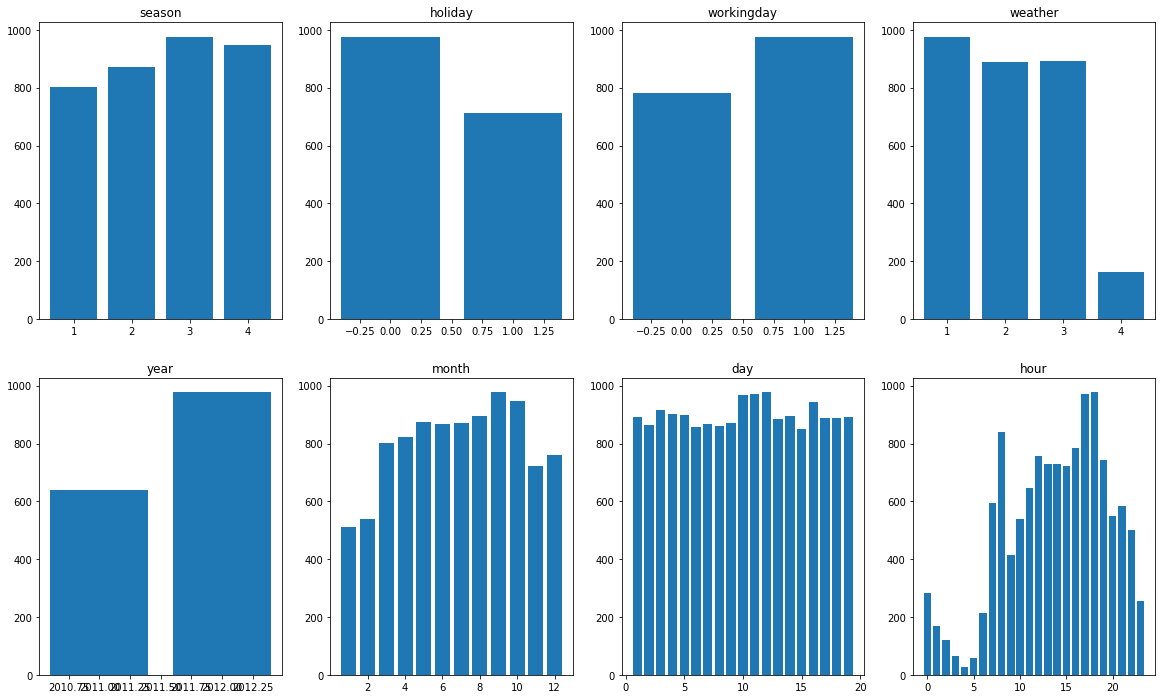

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))

plt.subplot(241)
plt.bar(X_train['season'], y_train)
plt.title("season")

plt.subplot(242)
plt.bar(X_train['holiday'], y_train)
plt.title("holiday")

plt.subplot(243)
plt.bar(X_train['workingday'], y_train)
plt.title("workingday")

plt.subplot(244)
plt.bar(X_train['weather'], y_train)
plt.title("weather")

plt.subplot(245)
plt.bar(X_train['year'], y_train)
plt.title("year")

plt.subplot(246)
plt.bar(X_train['month'], y_train)
plt.title("month")

plt.subplot(247)
plt.bar(X_train['day'], y_train)
plt.title("day")

plt.subplot(248)
plt.bar(X_train['hour'], y_train)
plt.title("hour")

plt.show()

In [ ]:
X_train['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

> 'season' : 가을에 가장 많은 빈도수를 보였음. 다만 특정 계절에서 유독 많은 빈도수를 보인 것까지는 아님

> 'holiday' : (주말 아닌) 공휴일에 공휴일이 아닌 날보다 유독 많이 이용한 것으로 보였음

> 'workingday' : 일하는 날보다는 주말 및 공휴일에 더 많이 이용한 것으로 보였음.

> 'weather' : 심한 눈/비, 천둘 번개인 날씨를 제외하면 모든 날씨에 큰 차이 없이 많이 이용한 것으로 나타났음.

> 'year' : 단순히 데이터를 모은 시기이므로 분석에 있어서 큰 의미는 없다고 판단하였음.

> 'month' : 9월과 10월에 주로 이용한 것으로 보였음.

> 'day' : 주로 11일, 12일, 13일에 이용한 것으로 보였음.

> 'hour' : 주로 18시, 19시에 이용한 것으로 보였음.

## 3-2. 숫자형 변수 그래프 그려보기

<Figure size 1440x864 with 0 Axes>

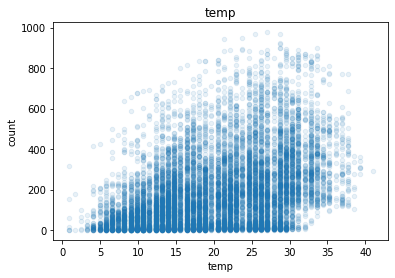

In [ ]:
plt.figure(figsize=(20,12))
train.plot(kind="scatter", x="temp", y="count", alpha=0.1)
plt.title("temp")

plt.show()

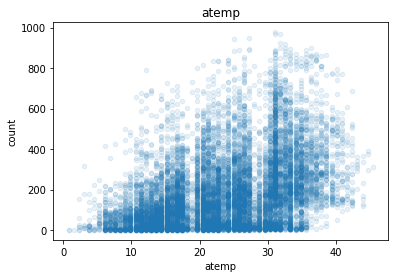

In [ ]:
train.plot(kind="scatter", x="atemp", y="count", alpha=0.1)
plt.title("atemp")
plt.show()

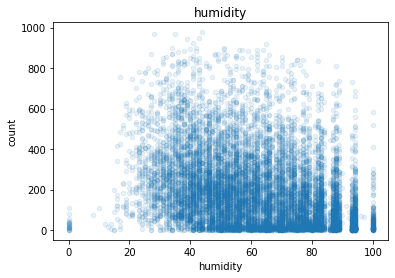

In [ ]:
train.plot(kind="scatter", x="humidity", y="count", alpha=0.1)
plt.title("humidity")
plt.show()

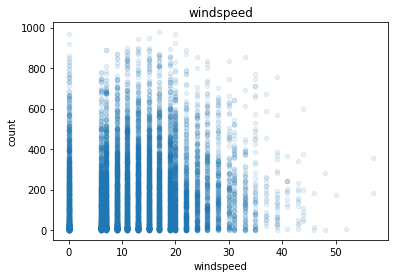

In [ ]:
train.plot(kind="scatter", x="windspeed", y="count", alpha=0.1)
plt.title("windspeed")
plt.show()

## 3-3. 상관관계 조사

In [ ]:
corr_matrix = train.corr()
corr_matrix['count'].sort_values(ascending=False)

count         1.000000
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

> 양/음의 상관계수를 모두 고려했을 때, 'hour', 'temp','atemp', 'humidity' 컬럼이 주로 유의해 보였음

# 4. 학습 전 전처리

## 4-1. 상관분석으로 얻은 유의한 특성들을 추출

In [ ]:
train_v = train[['hour', 'temp', 'atemp', 'humidity', 'count']]
X_valid_v = train[['hour', 'temp', 'atemp', 'humidity']]

In [ ]:
train_v.head()

,hour,temp,atemp,humidity,count
0,0,9.84,14.395,81,16
1,1,9.02,13.635,80,40
2,2,9.02,13.635,80,32
3,3,9.84,14.395,75,13
4,4,9.84,14.395,75,1


In [ ]:
train_v.head().isnull().sum()

hour        0
temp        0
atemp       0
humidity    0
count       0
dtype: int64

> 결측치가 없는 것을 확인하고 모델 학습 시작

> 결과적으로는 유의한 특성을 추출한 데이터셋에 대해서 성능이 더욱 좋지 않아 원본 데이터를 사용했습니다!

## 4-2. train, test 세트 나누기
* kaggle에서 제공한 train, test 세트에서
  - train 세트는 train/valid 데이터로 나누어 학습과 검증을 진행
  - test 세트는 submission 파일을 만들 때 마지막으로 사용

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('count', axis=1), train['count'], random_state=42, shuffle=True)

# 5. 모델 학습 및 성능 평가

## 5-1. 실험1: 모든 컬럼을 포함, 조건 X

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_valid)

In [16]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [17]:
from sklearn.metrics import mean_squared_error
# mse에 루트를 씌운 것이 rmse
# 반복적으로 사용할 것이므로 함수로 정의
def RMSE(data1, data2):
  return mean_squared_error(data1, data2)**0.5

In [18]:
RMSE(y_valid, y_pred)

57.55950822852107

## 5-2. 실험2: max_depth=3

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_valid)

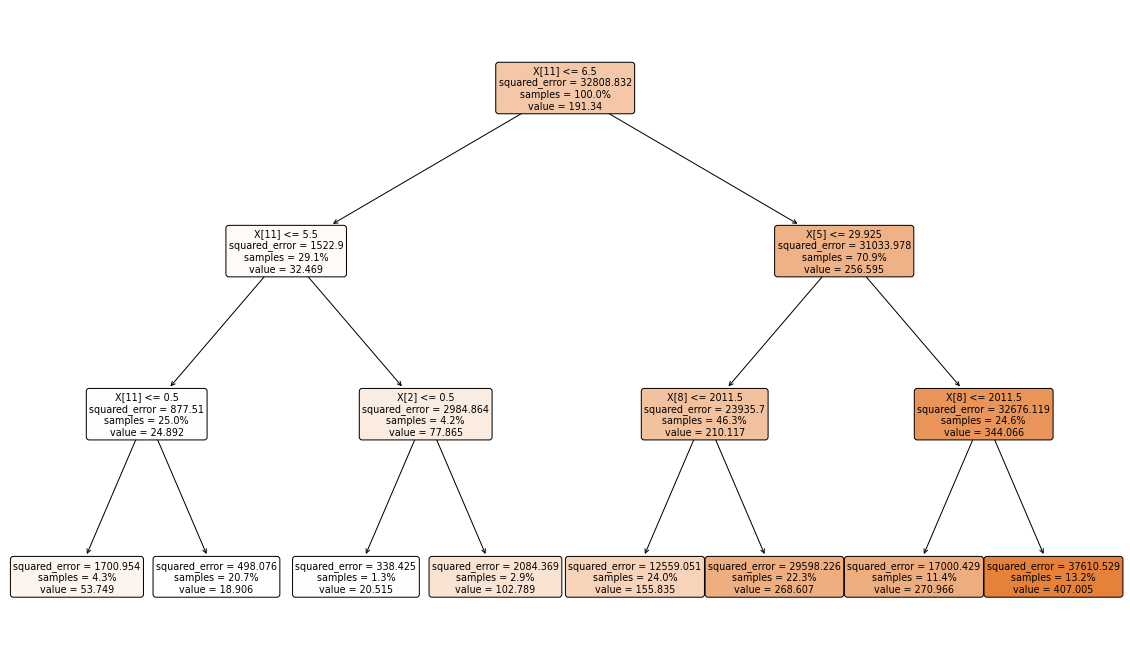

In [21]:
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plot_tree(tree_reg,
          filled=True,
          rounded=True,
          node_ids=False,
          impurity=True,
          max_depth=None, label='all',
          proportion=3, ax=None, fontsize=None)
plt.show()

In [22]:
RMSE(y_pred, y_valid)

130.849687956258

## 5-3. 실험3: max_depth=2

In [23]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_valid)

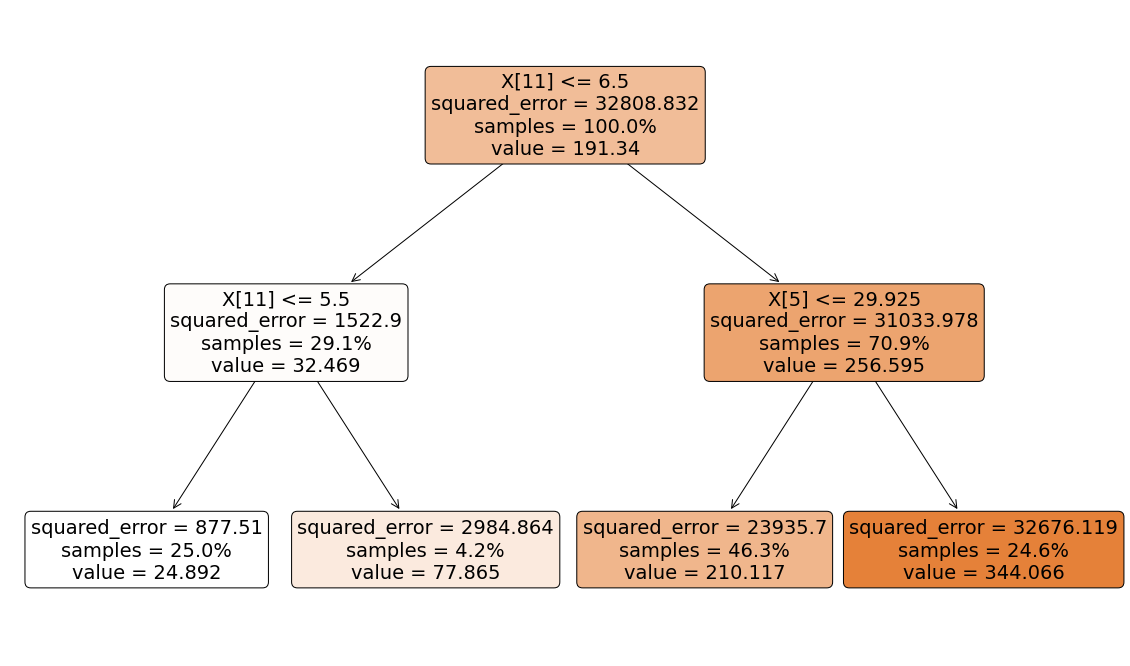

In [24]:
plt.figure(figsize=(20,12))
plot_tree(tree_reg,
          filled=True,
          rounded=True,
          node_ids=False,
          impurity=True,
          max_depth=None, label='all',
          proportion=3, ax=None, fontsize=None)
plt.show()

In [25]:
RMSE(y_pred, y_valid)

142.04488912059514

## 5-4. 실험4: min_samples_leaf=500

In [26]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=500, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_valid)

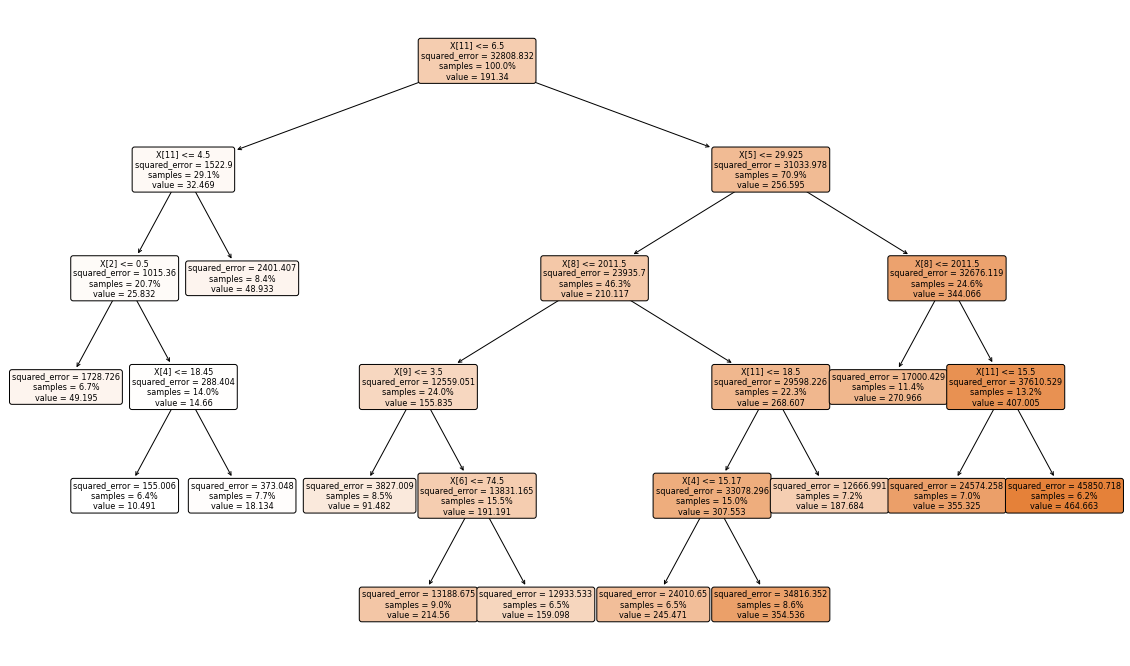

In [27]:
plt.figure(figsize=(20,12))
plot_tree(tree_reg,
          filled=True,
          rounded=True,
          node_ids=False,
          impurity=True,
          max_depth=None, label='all',
          proportion=3, ax=None, fontsize=None)
plt.show()

In [28]:
RMSE(y_pred, y_valid)

122.39153933315237

## 5-5. 실험5: min_samples_leaf=50

In [29]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=50, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_valid)

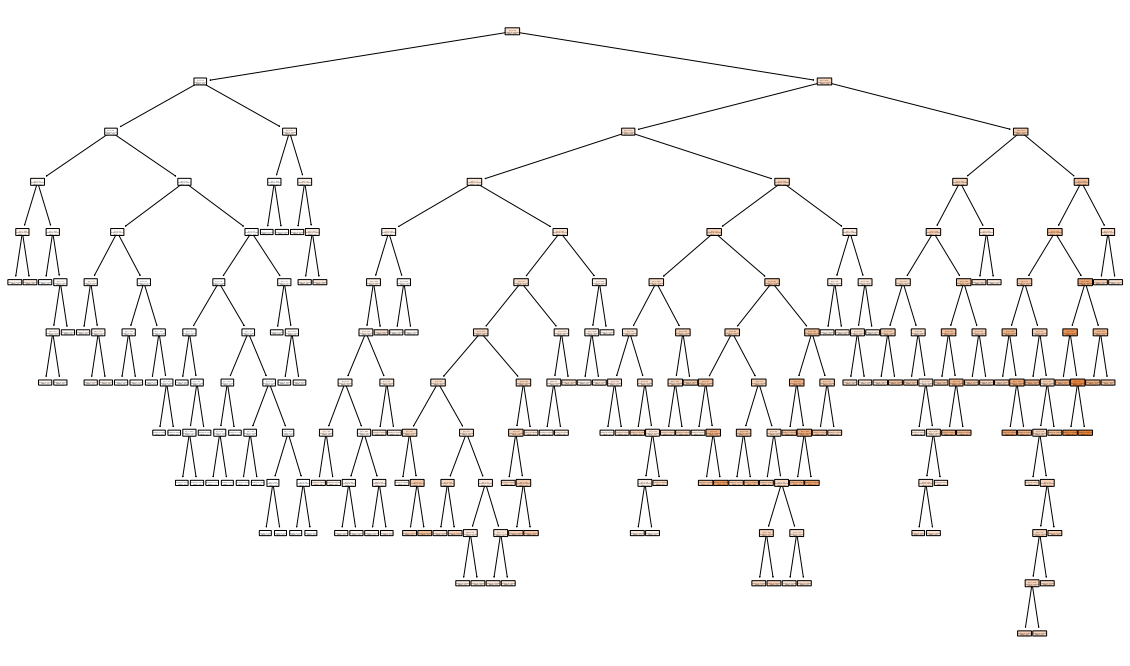

In [30]:
plt.figure(figsize=(20,12))
plot_tree(tree_reg,
          filled=True,
          rounded=True,
          node_ids=False,
          impurity=True,
          max_depth=None, label='all',
          proportion=3, ax=None, fontsize=None)
plt.show()

In [31]:
RMSE(y_pred, y_valid)

71.85527195525587

## 5-6. 실험6: grid search
* [사이킷런 도큐먼트](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [32]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
   'max_depth': [3, 5, 7, 10, 12], # 최대 깊이
   'min_samples_split': [5, 10, 15, 20, 25, 30], # 분할되기 위해 노드가 가져야하는 최소 샘플수
   'min_samples_leaf': [3, 5, 10, 15, 20, 25, 30], # 리프노드가 가지고 있어야 하는 최소 샘플 수
   'max_leaf_nodes': [10, 20, 30, 40, 50], # 리프 노드의 최대 수
   'max_features': [3, 5, 7, 9, 11, 13, 15] # 각 노드에서 분할에 사용할 특성의 최대 수
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10500 fits failed out of a total of 36750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must b

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 12],
                         'max_features': [3, 5, 7, 9, 11, 13, 15],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 25, 30],
                         'min_samples_split': [5, 10, 15, 20, 25, 30]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [34]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 11,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 20,
 'min_samples_split': 5}

In [35]:
tree_reg = DecisionTreeRegressor(max_depth=10, max_features=11, max_leaf_nodes=50, min_samples_leaf=20, min_samples_split=5, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=11, max_leaf_nodes=50,
                      min_samples_leaf=20, min_samples_split=5,
                      random_state=42)

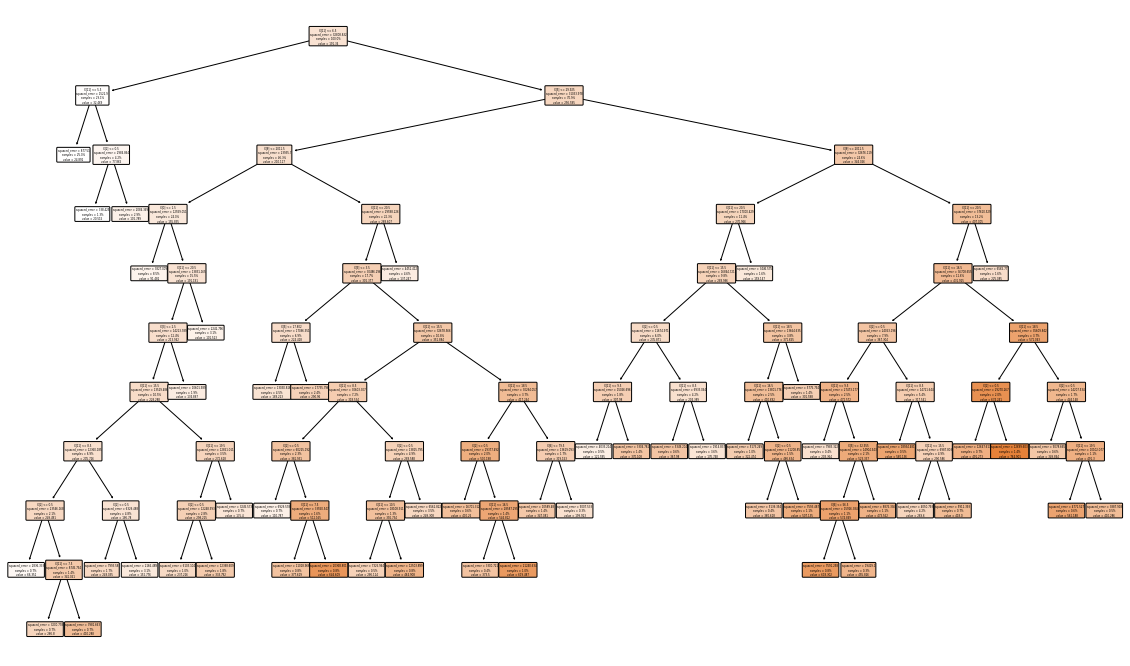

In [36]:
plt.figure(figsize=(20,12))
plot_tree(tree_reg,
          filled=True,
          rounded=True,
          node_ids=False,
          impurity=True,
          max_depth=None, label='all',
          proportion=3, ax=None, fontsize=None)
plt.show()

In [37]:
y_pred = tree_reg.predict(X_valid)
RMSE(y_pred, y_valid)

75.72359460490004

> 여러 실험을 해보았지만 규제를 하지 않은 모델에서 가장 좋은 성능(가장 낮은 RMSE)을 보였음

## 5-7. 실험7: grid search2
* [사이킷런 DecisionTreeRegressor 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [38]:
tree_reg = DecisionTreeRegressor(random_state=42)

In [39]:
param_grid = {
   'max_depth': [5, 10, 'None'],
   'min_samples_split': [2, 5, 7],
   'min_samples_leaf': [1, 5, 10, 15, 20, 25],
   'max_features': [5, 'auto', 'sqrt', 'log2', 'None'],
   'max_leaf_nodes': [30, 40, 50, 60, 'None'],
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3870 fits failed out of a total of 6750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 311, in fit
    "max_leaf_nodes must be integral number but was %r" % max_leaf_nodes
ValueError: max_leaf_nodes

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 'None'],
                         'max_features': [5, 'auto', 'sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [30, 40, 50, 60, 'None'],
                         'min_samples_leaf': [1, 5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 7]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [40]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [41]:
tree_reg = DecisionTreeRegressor(max_depth=10, 
                                 max_features='auto', 
                                 max_leaf_nodes=60, 
                                 min_samples_leaf=1, 
                                 min_samples_split=2, 
                                 random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', max_leaf_nodes=60,
                      random_state=42)

In [42]:
y_pred = tree_reg.predict(X_valid)
RMSE(y_pred, y_valid)

72.24485537869862

# 7. 결론

> 여러 실험을 통해 튜닝을 해보고 성능평가를 해보았지만, 제일 처음 조건에서 가장 좋은 성능(가장 낮은 RMSE)을 보였다.

In [ ]:
submission = pd.read_csv("sampleSubmission.csv")

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
last_pred = tree_reg.predict(X_test)

In [ ]:
for i in range(len(last_pred)):
  submission['count'][i] = last_pred[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission.to_csv("./mySubmission.csv", index=False)